### Color Threshhold, Green Screen

#### Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

import numpy as np
import cv2

%matplotlib inline

#### Read in and display the image

In [5]:
image = mpimg.imread('images/car_green_screen.jpg') # Reading the image

print("Image Dimension is :", image.shape) # # Print out the image dimensions (height, width, and depth (color))



Image Dimension is : (450, 660, 3)


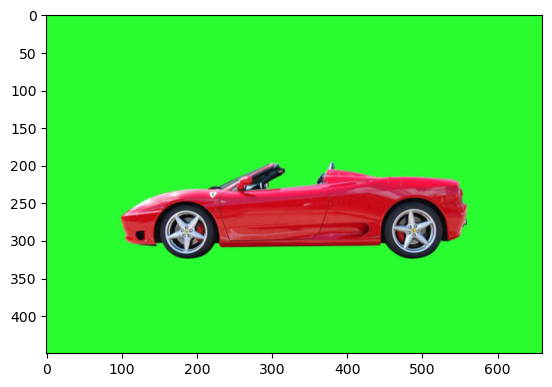

In [7]:
#Display the image
plt.imshow(image)

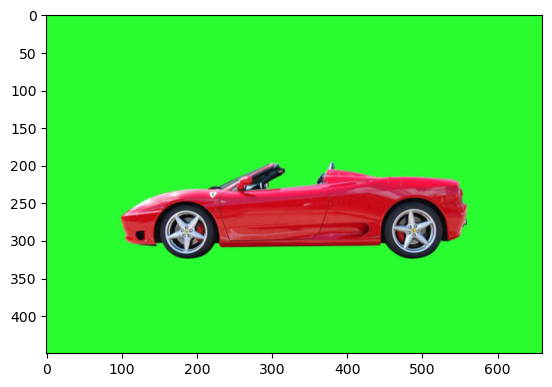

In [9]:
# Change color to RGB (from BGR)
image_copy = np.copy(image)

# Display the image copy
plt.imshow(image_copy)  #now it's changed to RGB

#### Define the color threshold


In [11]:
# Define our color selection boundaries in RGB values 

lower_green = np.array([0, 200, 0])
upper_green = np.array([250, 255,230])


#### Create a mask

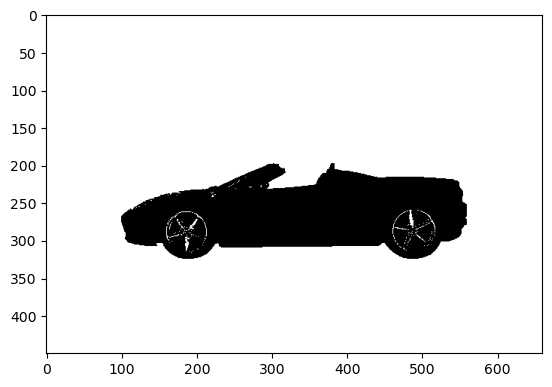

In [13]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

#Visualize the mask
plt.imshow(mask, cmap='gray')

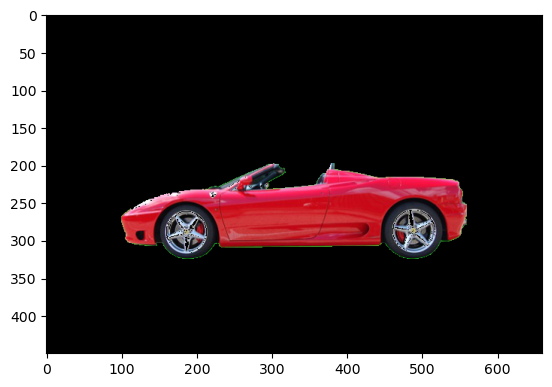

In [15]:
# Mask the image to let the car show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

# Display it
plt.imshow(masked_image)


#### Mask and add a background image

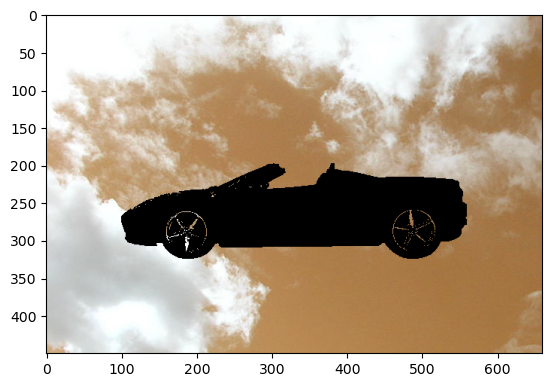

In [29]:
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

crop_background = background_image[0:450, 0:660]

crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

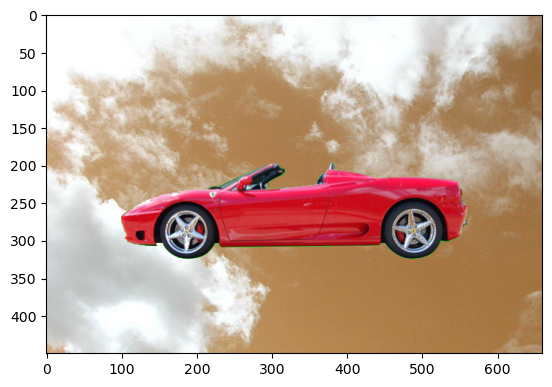

In [31]:
## TODO: Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)